In [ ]:
import yfinance as yf
import bt


tickers = ['BND', 'VT']
data = yf.download(tickers, start='2010-01-01')['Close']


data.columns = data.columns.str.lower()


[*********************100%***********************]  2 of 2 completed


In [50]:
data.calc_stats().display()

Stat                 bnd         vt
-------------------  ----------  ----------
Start                2010-01-04  2010-01-04
End                  2025-02-10  2025-02-10
Risk-free rate       0.00%       0.00%

Total Return         41.66%      286.54%
Daily Sharpe         0.50        0.60
Daily Sortino        0.78        0.93
CAGR                 2.33%       9.37%
Max Drawdown         -18.58%     -34.24%
Calmar Ratio         0.13        0.27

MTD                  0.35%       0.84%
3m                   -0.05%      1.31%
6m                   -0.17%      11.18%
YTD                  0.95%       3.92%
1Y                   3.72%       17.83%
3Y (ann.)            -0.70%      8.03%
5Y (ann.)            -0.52%      10.46%
10Y (ann.)           1.41%       9.58%
Since Incep. (ann.)  2.33%       9.37%

Daily Sharpe         0.50        0.60
Daily Sortino        0.78        0.93
Daily Mean (ann.)    2.43%       10.50%
Daily Vol (ann.)     4.84%       17.46%
Daily Skew           -0.96       -0.64
Daily 

<module 'matplotlib.pyplot' from 'C:\\Users\\User\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\matplotlib\\pyplot.py'>

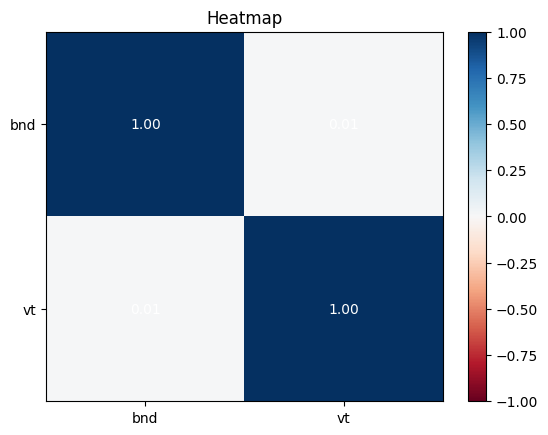

In [51]:
data.pct_change().plot_corr_heatmap()

In [52]:


# Define strategies
weight1 = {'bnd': 0, 'vt': 1.0}
strategy1 = bt.Strategy('Stock Only', [
    bt.algos.RunOnce(),
    bt.algos.SelectAll(),
    bt.algos.WeighSpecified(**weight1),
    bt.algos.Rebalance()
])
test1 = bt.Backtest(strategy1, data)

weight2 = {'bnd': 0.3, 'vt': 0.7}
strategy2 = bt.Strategy('70/30 Portfolio, No Rebalance', [
    bt.algos.RunOnce(),
    bt.algos.SelectAll(),
    bt.algos.WeighSpecified(**weight2),
    bt.algos.Rebalance()
])
test2 = bt.Backtest(strategy2, data)

strategy3 = bt.Strategy('70/30 Portfolio, Quarterly Rebalance', [
    bt.algos.RunQuarterly(),
    bt.algos.SelectAll(),
    bt.algos.WeighSpecified(**weight2),  # Same weight as test2
    bt.algos.Rebalance()
])
test3 = bt.Backtest(strategy3, data)

# Run backtests
res = bt.run(test1, test2, test3)


100%|██████████| 3/3 [00:00<00:00,  8.45it/s]


In [53]:
res.display()

Stat                 Stock Only    70/30 Portfolio, No Rebalance    70/30 Portfolio, Quarterly Rebalance
-------------------  ------------  -------------------------------  --------------------------------------
Start                2010-01-03    2010-01-03                       2010-01-03
End                  2025-02-10    2025-02-10                       2025-02-10
Risk-free rate       0.00%         0.00%                            0.00%

Total Return         286.54%       213.07%                          201.96%
Daily Sharpe         0.60          0.64                             0.66
Daily Sortino        0.93          0.99                             1.03
CAGR                 9.36%         7.85%                            7.59%
Max Drawdown         -34.24%       -27.37%                          -24.30%
Calmar Ratio         0.27          0.29                             0.31

MTD                  0.84%         0.78%                            0.70%
3m                   1.31%         

<Axes: title={'center': 'Equity Progression'}>

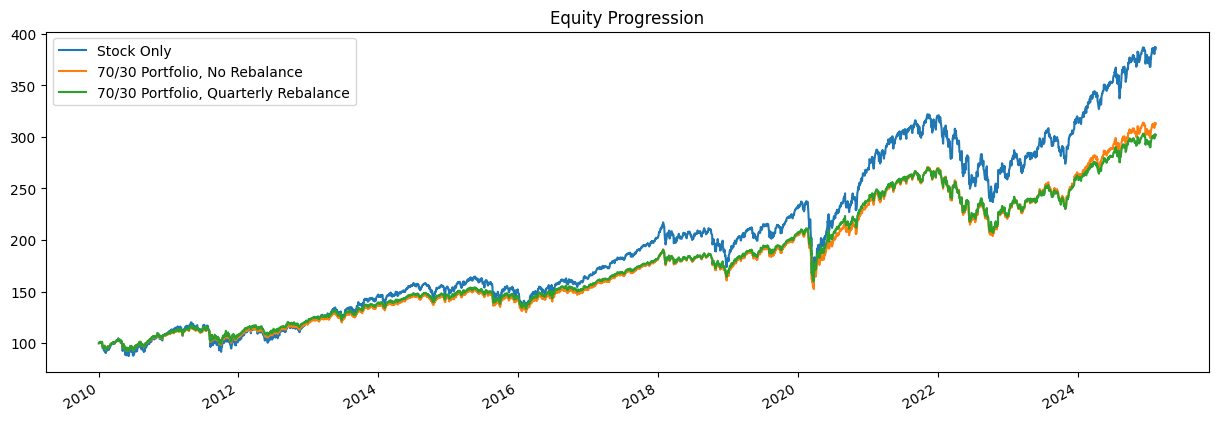

In [54]:
res.plot()